In [64]:
import os, glob
import numpy as np
import pandas as pd
from tqdm import tqdm

from astropy.table import Table, Column
from scipy.interpolate import interp1d

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.layouts import row
from bokeh.models import Label
output_notebook()

%matplotlib inline
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter


Loading BokehJS ...

In [143]:
def make_df(all_files):
    df= Table()
    mean_arr = []
    
    for i, val in enumerate(all_files):
        r = Table.read(val, format="csv")

        df.add_column(Column(np.round(r['pred'].data, 3),
                             name='s'+(val.split('_s')[-1]).split('_')[0]))

        mean_arr.append(np.round(r['pred'].data, 3))

    df.add_column(Column(np.nanmean(mean_arr, axis=0), name='pred'))
    
    df.add_column(Column(r['gt'].data, name='gt'), index=0)
    df.add_column(Column(r['tpeak'].data, name='peak'), index=0)
    df.add_column(Column(r['# tic'].data, name='tic'), index=0)

    return df

In [144]:
def calc_metrics(df, threshold=0.5):
    """
    Calculates metrics for each model as well as the ensemble
    of models.
    """
    ap, ac = [], []
    rs, ps = [], []
    for i, val in enumerate(df.columns[3:]):
    
        # CALCULATES AVERAGE PRECISION SCORE
        ap.append(np.round(average_precision_score(df['gt'].data, 
                                                   df[val].data, average=None), 4))
        # ROUNDED BASED ON THRESHOLD
        arr = np.copy(df[val].data)
        arr[arr >= threshold] = 1.0
        arr[arr < threshold] = 0.0
        
        # CALCULATES ACCURACY
        ac.append(np.round(np.sum(arr == df['gt'].data) / len(df), 4))
        
        
    pred_round = np.zeros(len(df))
    pred_round[df['pred'] >= threshold] = 1
    pred_round[df['pred'] < threshold]  = 0
    
    # CALCULATES RECALL SCORE
    rs = np.round(recall_score(df['gt'], pred_round), 4)
        
    # CALCULATES PRECISION SCORE
    ps = np.round(precision_score(df['gt'], pred_round), 4)

    # LAST INDEX IS ENSEMBLED VALUE
    return ap, ac, rs, ps

In [145]:
### GET DATA FROM ENSEMBLE OF VAL SET
DATADIR = '/Users/arcticfox/Documents/flares/results/test/'
files = np.sort(glob.glob(os.path.join(DATADIR,"*i350*predval*.txt")))
files = np.sort(glob.glob(os.path.join(DATADIR, "predval*i0350*_b0.73.txt")))


DF = make_df(files)

ap, acc, recall, precision = calc_metrics(DF)

precision



0.9867

In [5]:
### PRINT RECALL AND PRECISION VALUES
#print(round(recall_score(DF['gt'], DF['pred_round']), 3), 
#      round(precision_score(DF['gt'], DF['pred_round']), 3))

### MAKE CONFUSON MATRIX
print(confusion_matrix(DF["gt"].values, DF["pred_round"].values))

# """
# [TN, FP]
# [FN, TP]
# """


In [38]:
### INDEX CONFUSION MATRIX
#ind_tn = np.where( (DF['pred_round'] == 0) & (DF['gt'] == 0) )
#ind_fn = np.where( (DF['pred_round'] == 0) & (DF['gt'] == 1) )
#ind_tp = np.where( (DF['pred_round'] == 1) & (DF['gt'] == 1) )
#ind_fp = np.where( (DF['pred_round'] == 1) & (DF['gt'] == 0) )

In [51]:
FC = FLARE_CATALOG.to_pandas()
for i, val in enumerate(ind_fp[0]):
    
    print(val, DF["peak"].iloc[val], DF["peak"].iloc[val] + 2457000, DF["tic"].iloc[val], DF["pred"].iloc[val])
    
    # SEE IF VERY CLOSE TO KNOWN FLARE (REASON FOR FP)
    peak = DF["peak"].iloc[val] + 2457000.0
    fcc = FC.iloc[(FC['tpeak'] - peak).abs().argsort()[:1]]
    if (np.abs(fcc['tpeak'].values - peak) < 0.1) & (fcc['tic_id'].values[0] == DF["tic"].iloc[val]):
        print(i, val, fcc['tic_id'].values, fcc['tpeak'].values)
        
    lc = x_val[val]
    p1 = figure(width=750, height=300)
    p1.scatter(np.arange(len(lc)), lc)
    show(p1)

    if i > 20:
        break


281 1346.9965272309 2458346.996527231 180412528 0.969


472 1354.2548479048 2458354.2548479047 12359032 0.7426


554 1378.2519298323002 2458378.251929832 232073646 0.674


740 1358.7531402155 2458358.7531402153 220557560 0.759


895 1345.9681763849 2458345.968176385 149248196 0.6902


1988 1357.0640214710002 2458357.064021471 31740375 0.7397999999999999


In [48]:
files = glob.glob("../lc/real/" + str(141334293).zfill(9) + "*.npy")
files


['../lc/real/141334293_sector02.npy', '../lc/real/141334293_sector01.npy']

In [50]:
data = np.load(files[1], allow_pickle=True)
time, flux, flux_err = data[0], data[1], data[2]
            
p1 = figure(width=750, height=300)
p1.scatter(time, flux)
show(p1)

In [38]:
ind = np.where( (TICS == 161174284) )

data = DATA[ind[0][-4]]

p1 = figure(width=750, height=300)
p1.scatter(np.arange(len(data)), data)
show(p1)

PEAKS[ind[0][-4]]

1325.5418370232835

In [131]:
def plot_lc(data, ind, ax, color, shift=0):
    
    ax.set_xlim([0, 200])
    ax.set_ylim([-2, +2])
    ax.axvline(100, linestyle='dotted', color='gray', linewidth=0.5)
    ax.set_yticks([])
    ax.set_xticks([])
 
    lc = np.copy(data[ind])
    lc -= np.median(lc)
    lc /= np.abs(np.max(lc, axis=0))
    lc += shift
    
    ax.plot(lc, color=color, linewidth=2.5)
    
    return ax

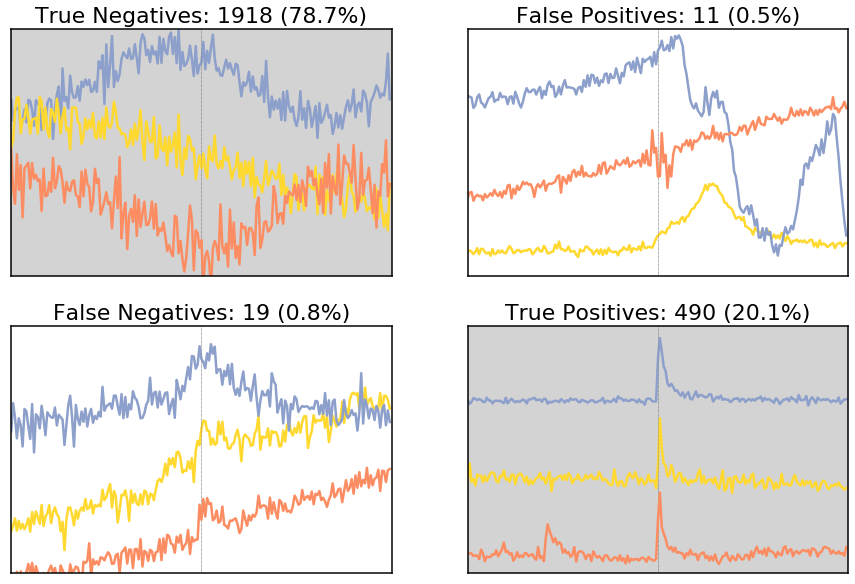

In [132]:

### SETUP PLOT
plt.close('all')
fig = plt.figure(figsize=(15, 10))
mpl.rc('xtick.major', size=4, pad=5, width=1.5)
mpl.rc('ytick.major', size=4, pad=3, width=1.5)
mpl.rc('xtick', labelsize=18)
mpl.rc('ytick', labelsize=18)
mpl.rc('axes', linewidth=1.5)
mpl.rc('lines', markersize=2)

pal = sns.color_palette("Set2", 6)
palhex = pal.as_hex()

### TRUE NEGATIVES (3, 6, 9, 17, 18, 410, 451)
ax_tn = fig.add_subplot(221)
ax_tn = plot_lc(x_val, ind_tn[0][410], ax_tn, palhex[2], shift=1)
ax_tn = plot_lc(x_val, ind_tn[0][9], ax_tn, palhex[5], shift=-.1)
ax_tn = plot_lc(x_val, ind_tn[0][17], ax_tn, palhex[1], shift=-0.8)
ax_tn.set_title('True Negatives: ' + str(len(ind_tn[0])) + ' (' + str(round(100 * len(ind_tn[0]) / len(y_val), 1)) + '%)', size=22)
ax_tn.set_facecolor('lightgray')

### FALSE POSITIVES (0, 1, 5, 8)
### 4 could be a real flare that was missed
ax_fp = fig.add_subplot(222)
ax_fp = plot_lc(x_val, ind_fp[0][6], ax_fp, palhex[5], shift=-1.5)
ax_fp = plot_lc(x_val, ind_fp[0][4], ax_fp, palhex[2], shift=+0.9)
ax_fp = plot_lc(x_val, ind_fp[0][1], ax_fp, palhex[1], shift=-0.1)
ax_fp.set_title('False Positives: ' + str(len(ind_fp[0])) + ' (' + str(round(100 * len(ind_fp[0]) / len(y_val), 1)) + '%)', size=22)

### FALSE NEGATIVES (2, 4, 5, 8, 9, 10, 13, 19)
ax_fn = fig.add_subplot(223)
ax_fn = plot_lc(x_val, ind_fn[0][2], ax_fn, palhex[5])
ax_fn = plot_lc(x_val, ind_fn[0][4], ax_fn, palhex[2], shift=+.7)
ax_fn = plot_lc(x_val, ind_fn[0][9], ax_fn, palhex[1], shift=-1.3)
ax_fn.set_title('False Negatives: ' + str(len(ind_fn[0])) + ' (' + str(round(100 * len(ind_fn[0]) / len(y_val), 1)) + '%)', size=22)

### TRUE POSITIVES
ax_tp = fig.add_subplot(224)
ax_tp = plot_lc(x_val, ind_tp[0][2], ax_tp, palhex[5], shift=-0.5)
ax_tp = plot_lc(x_val, ind_tp[0][10], ax_tp, palhex[2], shift=+0.8)
ax_tp = plot_lc(x_val, ind_tp[0][40], ax_tp, palhex[1], shift=-1.7)
ax_tp.set_title('True Positives: ' + str(len(ind_tp[0])) + ' (' + str(round(100 * len(ind_tp[0]) / len(y_val), 1)) + '%)', size=22)
ax_tp.set_facecolor('lightgray')

plt.savefig('../results/confusionmatrix.pdf', bbox_inches='tight', dpi=200, rastersized=True)